In [42]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from os import path, makedirs
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
import itertools
from sklearn.utils.fixes import signature

In [3]:
DATA_PATH = path.abspath("data/")
TEST_DATA_PATH = path.join(DATA_PATH, 'test')
TRAIN_DATA_PATH = path.join(DATA_PATH, 'train')
VALIDATION_DATA_PATH = path.join(DATA_PATH, 'validation')
DATA_FILE = path.join(DATA_PATH, 'data.csv')


In [4]:
data = pd.read_csv(path.join(DATA_PATH, 'data.csv')) 

In [5]:
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [6]:
data.isnull().describe()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,...,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207
unique,1,1,1,1,1,1,1,1,1,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,18207,18207,18207,18207,18207,18207,18207,18207,18207,17966,...,18159,18159,18159,18159,18159,18159,18159,18159,18159,16643


In [7]:
# Choose columns for analysis
chosen_columns = ['ID', 'Name', 'Age', 'Nationality','Overall', 'Potential', 'Club','Value', 'Wage', 'Special',
                  'Preferred Foot', 'International Reputation', 'Weak Foot','Skill Moves', 'Work Rate',
                  'Body Type', 'Position','Jersey Number','Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
                  'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
                  'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing','Finishing',
                  'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 
                  'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 
                  'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                  'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 
                  'StandingTackle', 'SlidingTackle', 'Release Clause','GKDiving','GKHandling','GKKicking',
                  'GKPositioning','GKReflexes','Joined','Contract Valid Until']

In [8]:
# Created DataFrame with chosen columns
# Use previous dataframe and use only selected columns as we mention in above code

df = pd.DataFrame(data, columns = chosen_columns)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,Release Clause,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Joined,Contract Valid Until
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,28.0,26.0,€226.5M,6.0,11.0,15.0,14.0,8.0,"Jul 1, 2004",2021
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,31.0,23.0,€127.1M,7.0,11.0,15.0,14.0,11.0,"Jul 10, 2018",2022
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,24.0,33.0,€228.1M,9.0,9.0,15.0,15.0,11.0,"Aug 3, 2017",2022
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,21.0,13.0,€138.6M,90.0,85.0,87.0,88.0,94.0,"Jul 1, 2011",2020
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,58.0,51.0,€196.4M,15.0,13.0,5.0,10.0,13.0,"Aug 30, 2015",2023


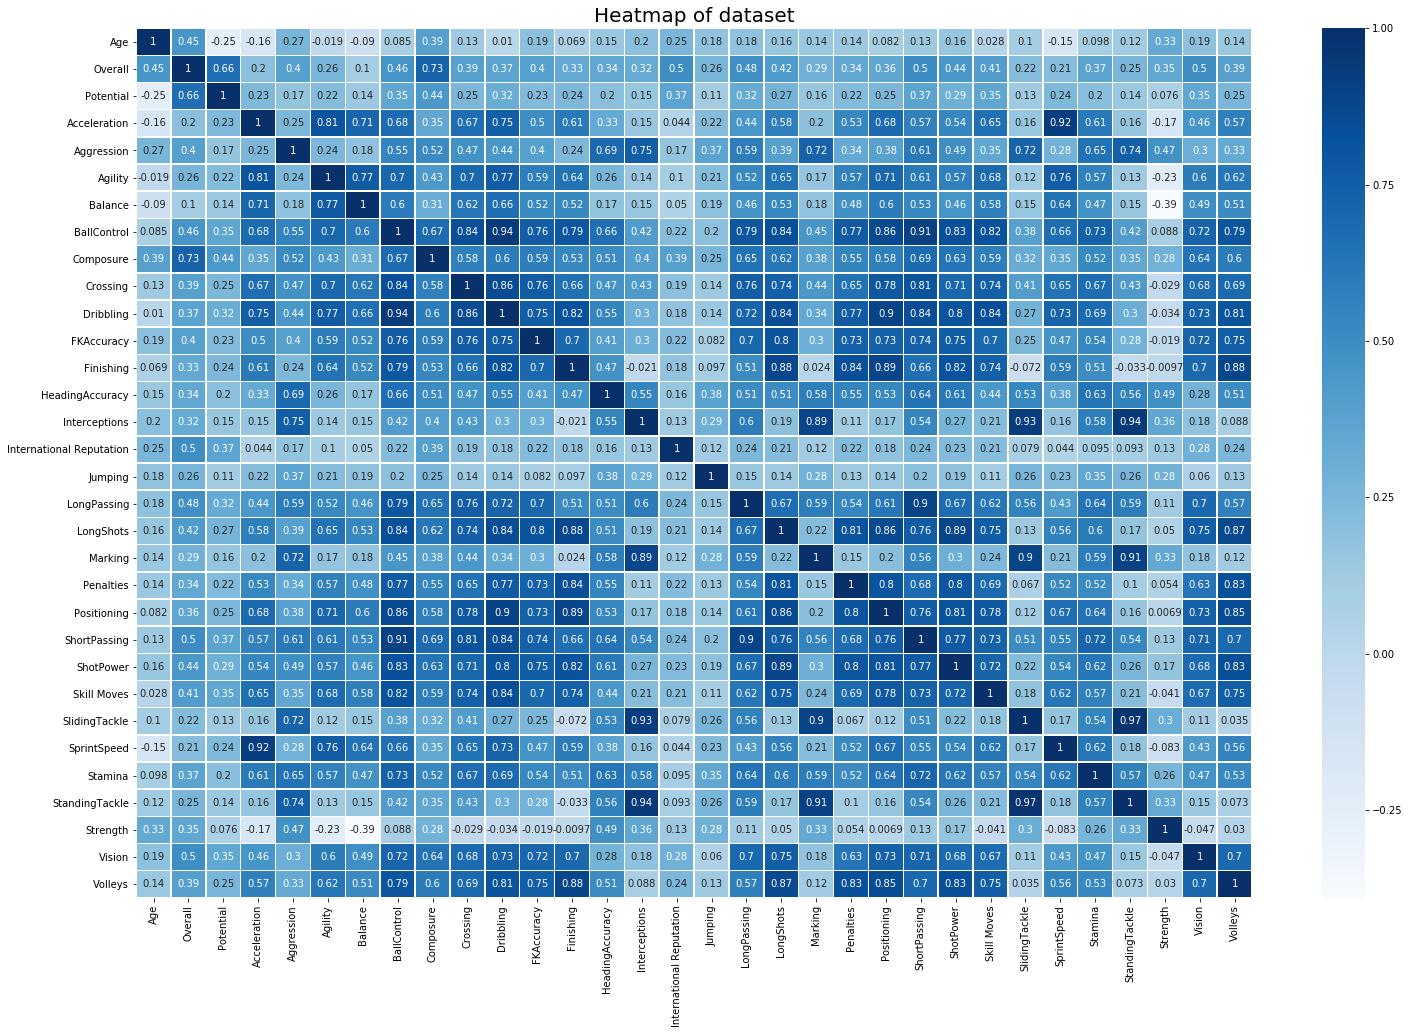

In [9]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20);

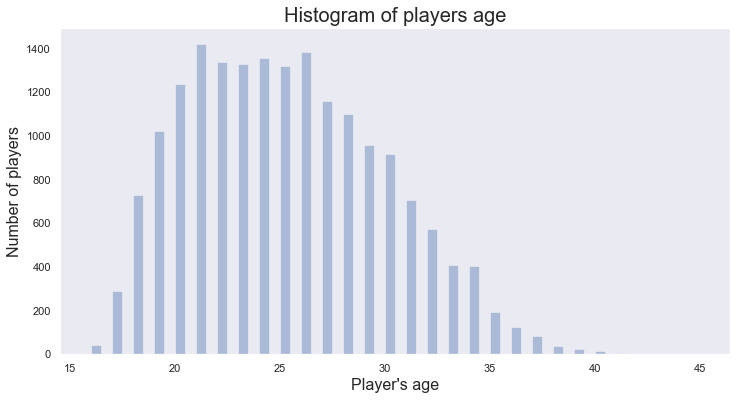

In [10]:
# Histogram: number of players's age

sns.set(style ="dark") # style dark means there is no any square box on histogram plot
plt.figure(figsize=(12,6))
ax = sns.distplot(df.Age, bins = 58, kde = False) #  bins => gap between two bar graph
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

In [11]:
# The ten eldest players

eldest = df.sort_values('Age', ascending = False)[['Name','Club', 'Nationality', 'Age']].head(10)
eldest.set_index('Name', inplace=True)
print(eldest)

                                       Club        Nationality  Age
Name                                                               
O. Pérez                            Pachuca             Mexico   45
K. Pilkington              Cambridge United            England   44
T. Warner                Accrington Stanley  Trinidad & Tobago   44
S. Narazaki                  Nagoya Grampus              Japan   42
C. Muñoz       CD Universidad de Concepción          Argentina   41
J. Villar                               NaN           Paraguay   41
H. Sulaimani                      Ohod Club       Saudi Arabia   41
M. Tyler                Peterborough United            England   41
B. Nivet                       ESTAC Troyes             France   41
F. Kippe                      Lillestrøm SK             Norway   40


In [14]:
modifedData=data.fillna(' ')


In [15]:
modifedData.to_csv('modifiedData.csv',index=False)


In [16]:
modifedData['Position'] = modifedData['Position'].apply(lambda x: 1 if x.endswith('B') else 0)


In [17]:
modifedData.Position

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
18177    0
18178    0
18179    1
18180    0
18181    1
18182    0
18183    0
18184    0
18185    0
18186    0
18187    1
18188    0
18189    0
18190    0
18191    1
18192    0
18193    1
18194    0
18195    0
18196    0
18197    0
18198    0
18199    0
18200    0
18201    1
18202    0
18203    0
18204    0
18205    0
18206    0
Name: Position, Length: 18207, dtype: int64

In [57]:
y = modifedData['Position']
x = modifedData.drop('Position', axis = 1)

print(x.shape)
print(y.shape)

(18207, 88)
(18207,)


In [58]:
x = x.astype(str).apply(preprocessing.LabelEncoder().fit_transform)

In [59]:
x

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,566,9632,15,566,6,122,47,45,213,...,84,25,20,17,38,3,7,6,62,294
1,1,6031,3153,17,6031,123,107,47,45,327,...,83,19,23,14,49,3,7,6,3,83
2,9319,3131,12508,10,3131,20,124,46,44,436,...,82,18,16,25,70,68,7,7,3,295
3,10430,3467,4136,11,3467,139,114,45,44,376,...,56,6,13,4,71,65,76,76,76,105
4,11541,3452,8617,11,3452,13,137,45,43,375,...,76,63,51,44,7,5,36,2,5,233
5,12652,1985,4419,11,1985,13,137,45,42,135,...,79,26,19,13,3,4,47,67,62,188
6,13763,1446,9640,16,1446,35,1,45,42,471,...,72,55,71,68,5,68,58,6,73,103
7,14874,1390,9841,15,1390,158,131,45,42,213,...,73,57,37,30,17,14,20,20,21,169
8,15985,483,15417,16,483,139,114,45,42,471,...,70,84,89,88,3,59,78,56,3,23
9,17096,4442,7775,9,4442,136,113,44,44,62,...,58,18,3,9,67,70,67,76,72,122


In [60]:
x = x.values #returns a numpy array
standart_scaler = StandardScaler()
x_scaled = standart_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)

C:\Users\mamon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mamon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
# x = x.values
# min_max=MinMaxScaler()
# x_min_max = min_max.fit_transform(x)
# x = pd.DataFrame(x_min_max)

In [50]:
x

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.000000,0.031089,0.560228,0.535714,0.031089,0.036810,0.748466,1.000000,0.978261,0.327189,...,1.000000,0.271739,0.222222,0.193182,0.535211,0.042857,0.088608,0.075949,0.815789,0.236334
1,0.000055,0.331264,0.183389,0.607143,0.331264,0.754601,0.656442,1.000000,0.978261,0.502304,...,0.988095,0.206522,0.255556,0.159091,0.690141,0.042857,0.088608,0.075949,0.039474,0.066720
2,0.511864,0.171976,0.727505,0.357143,0.171976,0.122699,0.760736,0.978723,0.956522,0.669739,...,0.976190,0.195652,0.177778,0.284091,0.985915,0.971429,0.088608,0.088608,0.039474,0.237138
3,0.572888,0.190432,0.240563,0.392857,0.190432,0.852761,0.699387,0.957447,0.956522,0.577573,...,0.666667,0.065217,0.144444,0.045455,1.000000,0.928571,0.962025,0.962025,1.000000,0.084405
4,0.633912,0.189608,0.501192,0.392857,0.189608,0.079755,0.840491,0.957447,0.934783,0.576037,...,0.904762,0.684783,0.566667,0.500000,0.098592,0.071429,0.455696,0.025316,0.065789,0.187299
5,0.694936,0.109030,0.257023,0.392857,0.109030,0.079755,0.840491,0.957447,0.913043,0.207373,...,0.940476,0.282609,0.211111,0.147727,0.042254,0.057143,0.594937,0.848101,0.815789,0.151125
6,0.755960,0.079424,0.560693,0.571429,0.079424,0.214724,0.006135,0.957447,0.913043,0.723502,...,0.857143,0.597826,0.788889,0.772727,0.070423,0.971429,0.734177,0.075949,0.960526,0.082797
7,0.816983,0.076348,0.572384,0.535714,0.076348,0.969325,0.803681,0.957447,0.913043,0.327189,...,0.869048,0.619565,0.411111,0.340909,0.239437,0.200000,0.253165,0.253165,0.276316,0.135852
8,0.878007,0.026530,0.896702,0.571429,0.026530,0.852761,0.699387,0.957447,0.913043,0.723502,...,0.833333,0.913043,0.988889,1.000000,0.042254,0.842857,0.987342,0.708861,0.039474,0.018489
9,0.939031,0.243985,0.452219,0.321429,0.243985,0.834356,0.693252,0.936170,0.956522,0.095238,...,0.690476,0.195652,0.033333,0.102273,0.943662,1.000000,0.848101,0.962025,0.947368,0.098071


In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14565, 88)
(14565,)
(3642, 88)
(3642,)


In [52]:
logreg = LogisticRegression(verbose=1)
logreg


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

In [53]:
logreg.fit(X_train, y_train)

C:\Users\mamon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

In [54]:
y_test

16982    0
12930    0
17869    0
10326    0
5563     0
11806    0
14183    1
1158     0
14077    0
4490     1
17935    0
6803     1
10712    0
9041     1
4662     1
12703    0
13119    1
15205    0
3289     0
4910     0
5894     0
10604    1
14745    0
11019    0
8164     0
9670     1
11063    0
5715     1
15254    1
2174     0
        ..
8972     1
13084    0
14910    0
14060    0
15708    0
13525    0
6003     1
276      1
6321     1
9007     0
16465    1
17222    0
17928    0
14242    0
3223     0
1100     0
6284     0
6777     0
17853    0
6553     1
5059     0
4288     1
1539     0
11263    1
2731     1
12943    1
10070    1
1629     0
14783    1
11609    1
Name: Position, Length: 3642, dtype: int64

In [55]:
pred_class = logreg.predict(X_test)
pred_class[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_class)

0.9472817133443163

In [36]:
from sklearn.utils import shuffle
X_shuf, Y_shuf = shuffle(x, y)

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X_shuf, 
                                                        Y_shuf,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        verbose = 1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

[learning_curve] Training set sizes: [  163   494   825  1156  1488  1819  2150  2481  2812  3143  3474  3805
  4136  4467  4798  5129  5460  5791  6122  6453  6784  7115  7446  7777
  8108  8439  8770  9102  9433  9764 10095 10426 10757 11088 11419 11750
 12081 12412 12743 13074 13405 13736 14067 14398 14729 15060 15391 15722
 16053 16385]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


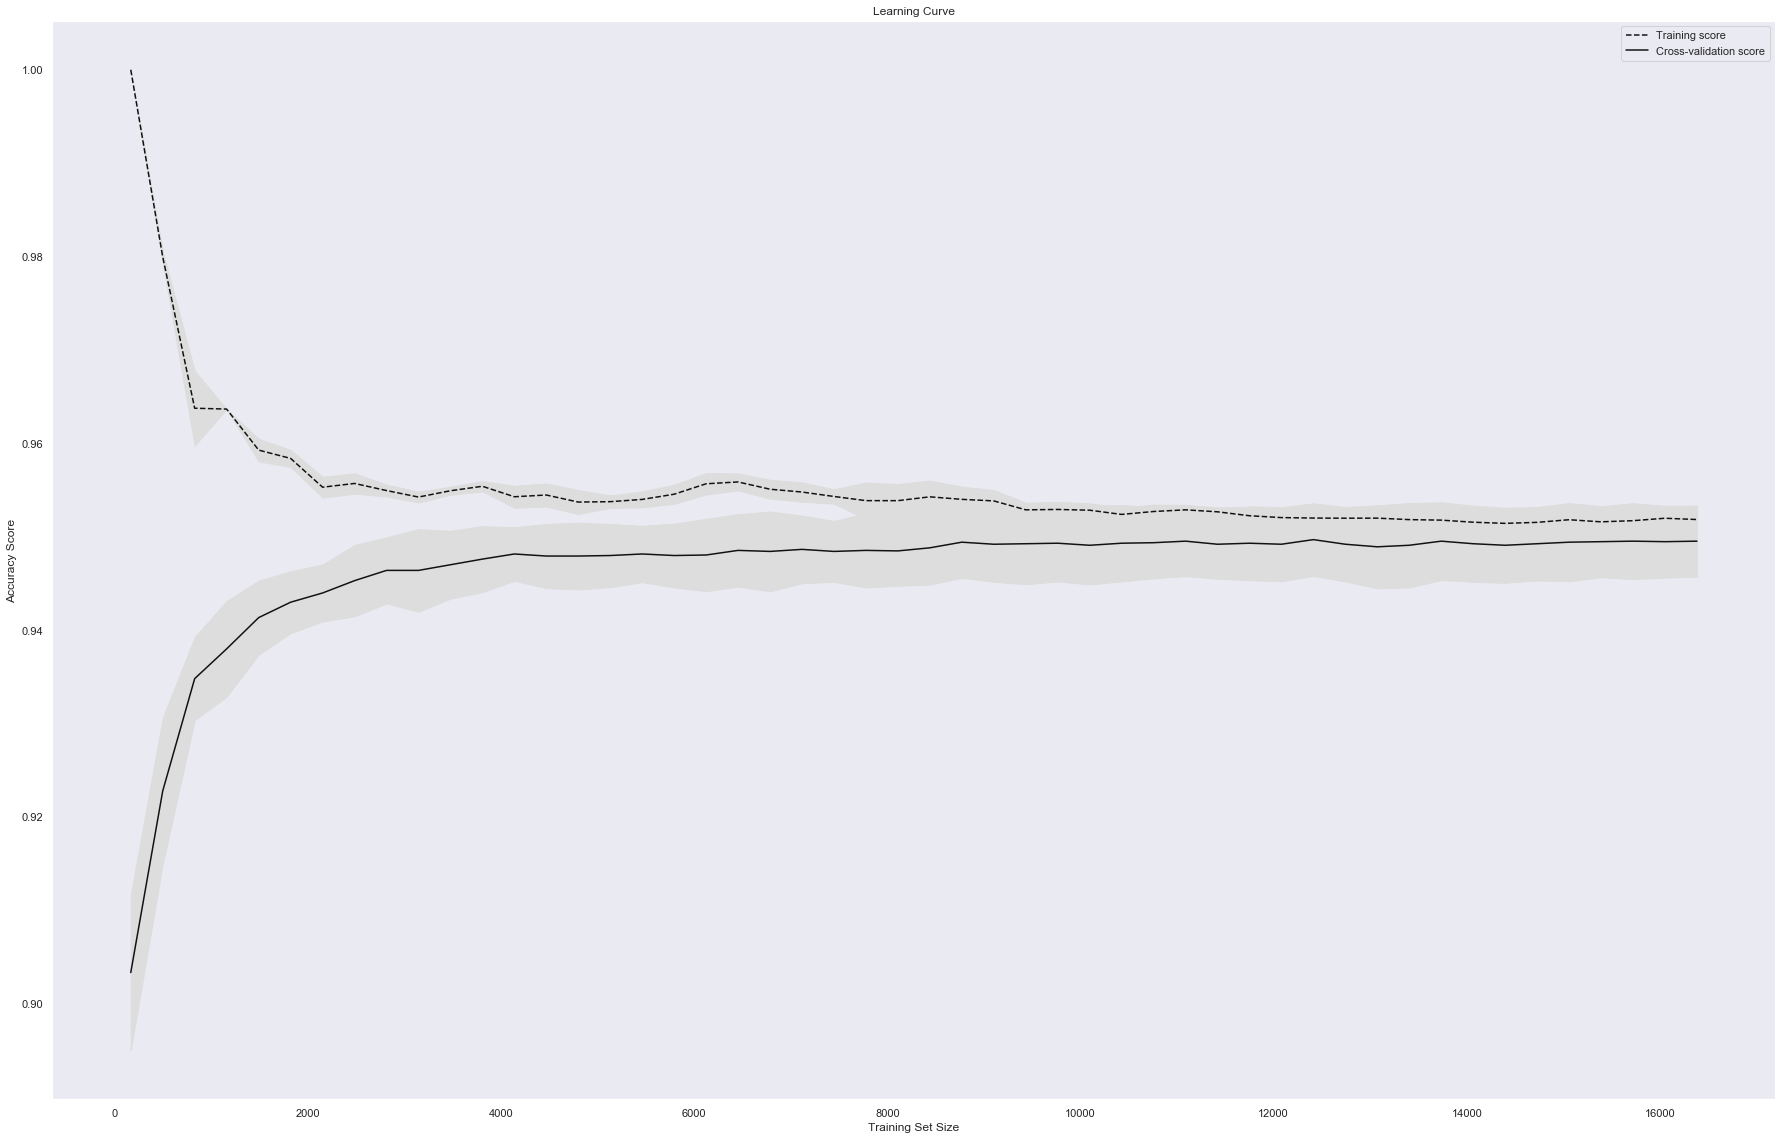

In [37]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Normalized confusion matrix
[[0.96656051 0.03343949]
 [0.06371681 0.93628319]]


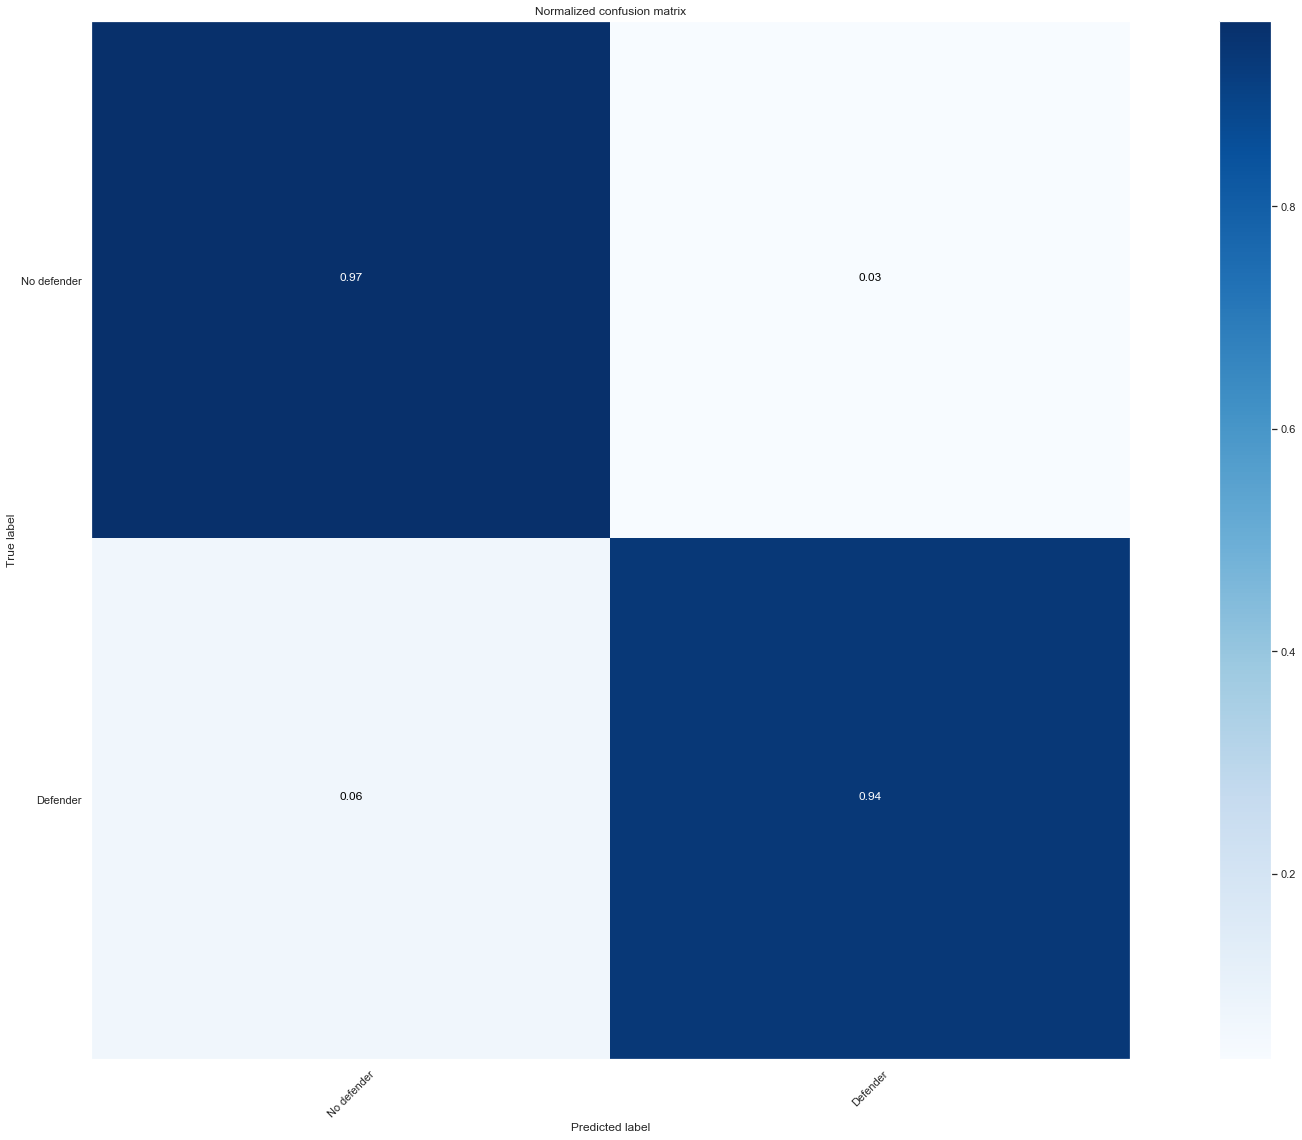

In [38]:
cm = confusion_matrix(y_test, pred_class)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
classes = ['No defender', 'Defender']
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

Average precision-recall score: 0.97


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

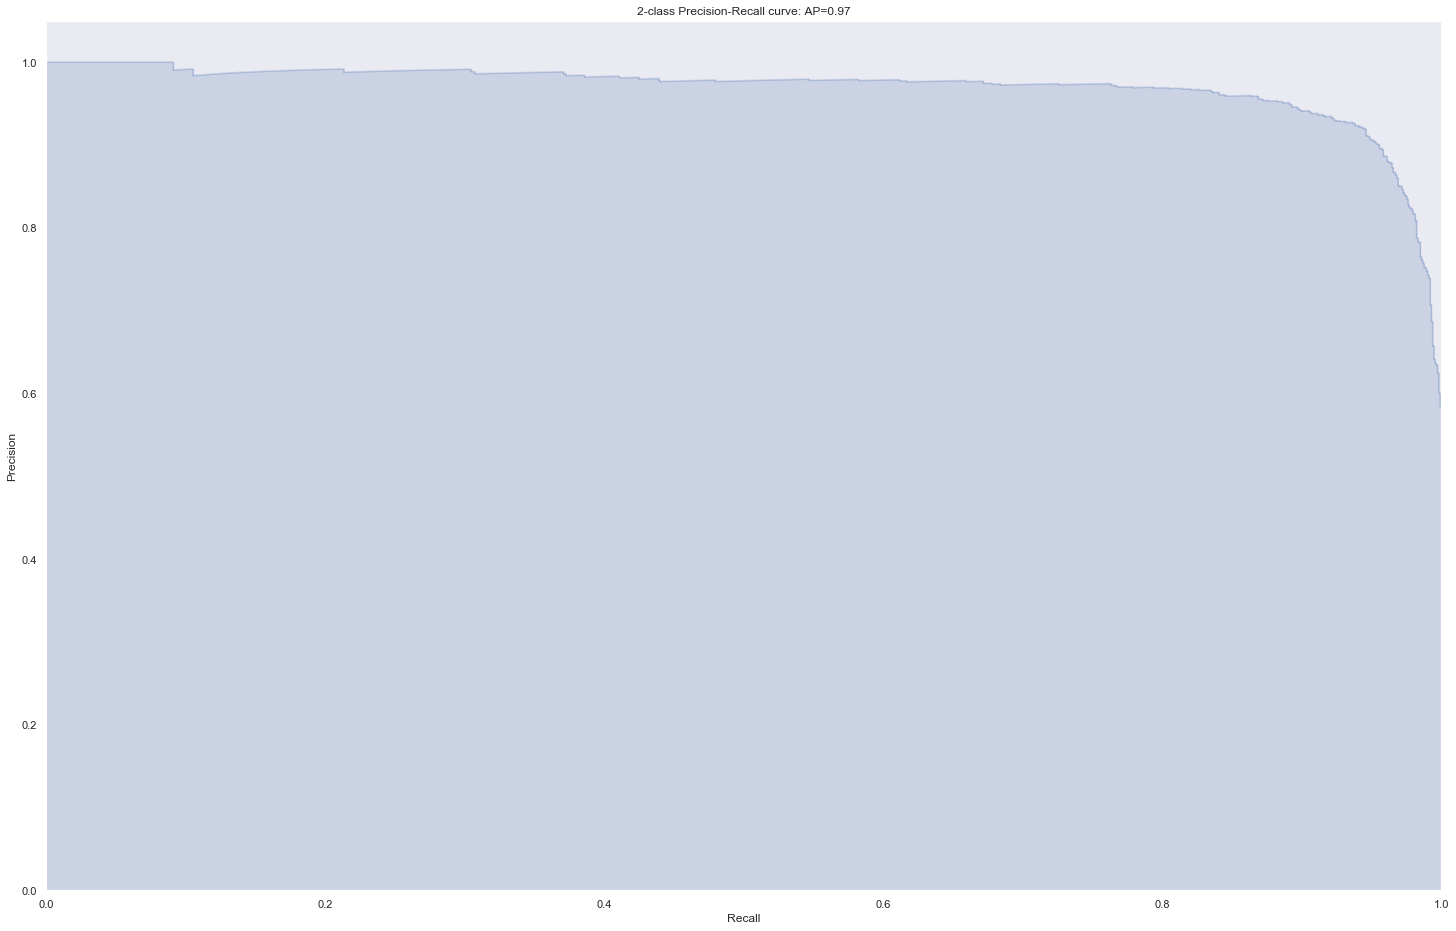

In [39]:
y_score = logreg.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [40]:
from sklearn.metrics import f1_score
print(f1_score(y_test, pred_class, average='macro'))  
print(f1_score(y_test, pred_class, average='micro'))  
print(f1_score(y_test, pred_class, average='weighted'))  
print(f1_score(y_test, pred_class, average=None))


0.950106364443645
0.957166392092257
0.957228231750493
[0.9688747  0.93133803]
